In [40]:
import pandas as pd
import numpy as np
import pymysql
import getpass
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Get some data

In [2]:
conn = pymysql.connect(host="localhost",
                       port=3306,
                       user="ironhack",
                       passwd=getpass.getpass(),
                       db="olist")

········


SQL query took to long, so we join in pandas

In [ ]:
# order_items = pd.read_sql("SELECT * FROM order_items;", conn)

In [3]:
def read_sql_table(table_name, conn):
    return pd.read_sql(f"SELECT * FROM {table_name}", conn)

In [4]:
order_items = read_sql_table("order_items", conn)

In [7]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
tables = ["order_items", "orders", "sellers", "products", "product_category_name_translation"]
order_items, orders, sellers, products, product_category_name_translation = [read_sql_table(table,conn) for table in tables]

In [12]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


# As an alternative to:
```python
order_items = pd.read_sql("SELECT * FROM order_items;", conn)
orders = pd.read_sql("SELECT * FROM orders;", conn)
...
```

Rewrite the sql query that ran forever to pandas:

```sql
SELECT
    o.order_purchase_timestamp,
    oi.order_id,
    oi.order_item_id,
    oi.seller_id,
    s.seller_state,
    pcnt.product_category_name_english,
    oi.price
FROM order_items oi
    JOIN orders o
    ON oi.order_id = o.order_id
    JOIN sellers s
    ON oi.seller_id = s.seller_id
    JOIN products p
    ON oi.product_id = p.product_id
    JOIN product_category_name_translation pcnt
    ON p.product_category_name = pcnt.product_category_name;
    ```

In [18]:
df = (order_items
      .merge(orders, on="order_id")
      .merge(sellers, on="seller_id")
      .merge(products, on="product_id")
      .merge(product_category_name_translation, on="product_category_name"))[["order_purchase_timestamp",
                                                                              "order_id",
                                                                              "order_item_id",
                                                                              "seller_id",
                                                                              "seller_state",
                                                                              "product_category_name_english",
                                                                              "price"]]

In [19]:
df.head()

,order_purchase_timestamp,order_id,order_item_id,seller_id,seller_state,product_category_name_english,price
0,2017-09-13 08:59:02,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,SP,cool_stuff\r,58.9
1,2017-06-28 11:52:20,130898c0987d1801452a8ed92a670612,1,48436dade18ac8b2bce089ec2a041202,SP,cool_stuff\r,55.9
2,2018-05-18 10:25:53,532ed5e14e24ae1f0d735b91524b98b9,1,48436dade18ac8b2bce089ec2a041202,SP,cool_stuff\r,64.9
3,2017-08-01 18:38:42,6f8c31653edb8c83e1a739408b5ff750,1,48436dade18ac8b2bce089ec2a041202,SP,cool_stuff\r,58.9
4,2017-08-10 21:48:40,7d19f4ef4d04461989632411b7e588b9,1,48436dade18ac8b2bce089ec2a041202,SP,cool_stuff\r,58.9


In [20]:
df.dtypes

order_purchase_timestamp         datetime64[ns]
order_id                                 object
order_item_id                             int64
seller_id                                object
seller_state                             object
product_category_name_english            object
price                                   float64
dtype: object

In [22]:
columns = {"order_purchase_timestamp": "timestamp",
           "product_category_name_english": "product_cat"}

df = df.rename(columns=columns)

### 1. Truncate timestamps to monthly precision

In [25]:
df["timestamp"].dt.to_period("M")

0         2017-09
1         2017-06
2         2018-05
3         2017-08
4         2017-08
           ...   
111018    2018-07
111019    2018-07
111020    2018-07
111021    2018-08
111022    2018-08
Name: timestamp, Length: 111023, dtype: period[M]

Kinda works, but we don't want to deal with Period objects

In [27]:
pd.to_datetime(df["timestamp"].dt.strftime("%Y-%m-01"))

0        2017-09-01
1        2017-06-01
2        2018-05-01
3        2017-08-01
4        2017-08-01
            ...    
111018   2018-07-01
111019   2018-07-01
111020   2018-07-01
111021   2018-08-01
111022   2018-08-01
Name: timestamp, Length: 111023, dtype: datetime64[ns]

In [28]:
df["timestamp"] = pd.to_datetime(df["timestamp"].dt.strftime("%Y-%m-01"))

In [29]:
df.head()

,timestamp,order_id,order_item_id,seller_id,seller_state,product_cat,price
0,2017-09-01,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,SP,cool_stuff\r,58.9
1,2017-06-01,130898c0987d1801452a8ed92a670612,1,48436dade18ac8b2bce089ec2a041202,SP,cool_stuff\r,55.9
2,2018-05-01,532ed5e14e24ae1f0d735b91524b98b9,1,48436dade18ac8b2bce089ec2a041202,SP,cool_stuff\r,64.9
3,2017-08-01,6f8c31653edb8c83e1a739408b5ff750,1,48436dade18ac8b2bce089ec2a041202,SP,cool_stuff\r,58.9
4,2017-08-01,7d19f4ef4d04461989632411b7e588b9,1,48436dade18ac8b2bce089ec2a041202,SP,cool_stuff\r,58.9


In [33]:
df = df.rename(columns={"timestamp": "month"})

### 2. Create an intermediate aggregated dataset

In [36]:
(df[["month", "seller_state", "product_cat", "price"]]
 .groupby(["month", "seller_state", "product_cat"])
 .agg("sum"))

price
month      seller_state product_cat                                        
2016-09-01 MG           furniture_decor\r                             72.89
           PR           health_beauty\r                              134.97
                        telephony\r                                   59.50
2016-10-01 AC           books_technical\r                            267.00
           BA           computers_accessories\r                      161.55
...                                                                     ...
2018-08-01 SP           stationery\r                                9634.43
                        telephony\r                                12508.34
                        toys\r                                     10306.56
                        watches_gifts\r                            59062.20
2018-09-01 SP           kitchen_dining_laundry_garden_furniture\r    145.00

[4669 rows x 1 columns]

In [41]:
(df[["month", "seller_state", "product_cat", "price"]]
 .groupby(["month", "seller_state", "product_cat"])
 .agg(np.sum))

price
month      seller_state product_cat                                        
2016-09-01 MG           furniture_decor\r                             72.89
           PR           health_beauty\r                              134.97
                        telephony\r                                   59.50
2016-10-01 AC           books_technical\r                            267.00
           BA           computers_accessories\r                      161.55
...                                                                     ...
2018-08-01 SP           stationery\r                                9634.43
                        telephony\r                                12508.34
                        toys\r                                     10306.56
                        watches_gifts\r                            59062.20
2018-09-01 SP           kitchen_dining_laundry_garden_furniture\r    145.00

[4669 rows x 1 columns]

In [42]:
## Passing multiple agg functions
(df[["month", "seller_state", "product_cat", "price"]]
 .groupby(["month", "seller_state", "product_cat"])
 .agg(["sum", "count"]))

price  \
                                                                        sum   
month      seller_state product_cat                                           
2016-09-01 MG           furniture_decor\r                             72.89   
           PR           health_beauty\r                              134.97   
                        telephony\r                                   59.50   
2016-10-01 AC           books_technical\r                            267.00   
           BA           computers_accessories\r                      161.55   
...                                                                     ...   
2018-08-01 SP           stationery\r                                9634.43   
                        telephony\r                                12508.34   
                        toys\r                                     10306.56   
                        watches_gifts\r                            59062.20   
2018-09-01 SP           kitchen_dining_laundry_garden_furniture\r    145.00   

                                                                         
                                                                  count  
month      seller_state product_cat                                      
2016-09-01 MG           furniture_decor\r                             2  
           PR           health_beauty\r                               3  
                        telephony\r                                   1  
2016-10-01 AC           books_technical\r                             1  
           BA           computers_accessories\r                       1  
...                                                                 ...  
2018-08-01 SP           stationery\r                                119  
                        telephony\r                                 172  
                        toys\r                                      118  
                        watches_gifts\r                             368  
2018-09-01 SP           kitchen_dining_laundry_garden_furniture\r     1  

[4669 rows x 2 columns]

In [43]:
# or more generally, pass a dict to the .agg() method to have control over which columns which agg function should be applied to
(df[["month", "seller_state", "product_cat", "price"]]
 .groupby(["month", "seller_state", "product_cat"])
 .agg({"price": ["sum", "count"]}))

price  \
                                                                        sum   
month      seller_state product_cat                                           
2016-09-01 MG           furniture_decor\r                             72.89   
           PR           health_beauty\r                              134.97   
                        telephony\r                                   59.50   
2016-10-01 AC           books_technical\r                            267.00   
           BA           computers_accessories\r                      161.55   
...                                                                     ...   
2018-08-01 SP           stationery\r                                9634.43   
                        telephony\r                                12508.34   
                        toys\r                                     10306.56   
                        watches_gifts\r                            59062.20   
2018-09-01 SP           kitchen_dining_laundry_garden_furniture\r    145.00   

                                                                         
                                                                  count  
month      seller_state product_cat                                      
2016-09-01 MG           furniture_decor\r                             2  
           PR           health_beauty\r                               3  
                        telephony\r                                   1  
2016-10-01 AC           books_technical\r                             1  
           BA           computers_accessories\r                       1  
...                                                                 ...  
2018-08-01 SP           stationery\r                                119  
                        telephony\r                                 172  
                        toys\r                                      118  
                        watches_gifts\r                             368  
2018-09-01 SP           kitchen_dining_laundry_garden_furniture\r     1  

[4669 rows x 2 columns]

But! you have to deal with weird indexes

In [70]:
df_agg = (df[["month", "seller_state", "product_cat", "price"]]
          .groupby(["month", "seller_state", "product_cat"])
          .agg({"price": ["sum", "count"]}))

In [71]:
df_agg = (df_agg
          .reset_index())
df_agg.head()

month seller_state              product_cat   price      
                                                       sum count
0 2016-09-01           MG        furniture_decor\r   72.89     2
1 2016-09-01           PR          health_beauty\r  134.97     3
2 2016-09-01           PR              telephony\r   59.50     1
3 2016-10-01           AC        books_technical\r  267.00     1
4 2016-10-01           BA  computers_accessories\r  161.55     1

Even after resetting the column index, we get some weird multiIndex

In [77]:
df_agg.columns

MultiIndex([(       'month',      ''),
            ('seller_state',      ''),
            ( 'product_cat',      ''),
            (       'price',   'sum'),
            (       'price', 'count')],
           )

In [78]:
df_agg.columns.to_flat_index()

Index([       ('month', ''), ('seller_state', ''),  ('product_cat', ''),
           ('price', 'sum'),   ('price', 'count')],
      dtype='object')

In [79]:
list(df_agg.columns.to_flat_index())

[('month', ''),
 ('seller_state', ''),
 ('product_cat', ''),
 ('price', 'sum'),
 ('price', 'count')]

In [80]:
[first+second for first, second in df_agg.columns]

['month', 'seller_state', 'product_cat', 'pricesum', 'pricecount']

In [81]:
df_agg.columns = [first+second for first, second in df_agg.columns.to_flat_index()]

In [82]:
df_agg.head()

,month,seller_state,product_cat,pricesum,pricecount
0,2016-09-01,MG,furniture_decor\r,72.89,2
1,2016-09-01,PR,health_beauty\r,134.97,3
2,2016-09-01,PR,telephony\r,59.50,1
3,2016-10-01,AC,books_technical\r,267.00,1
4,2016-10-01,BA,computers_accessories\r,161.55,1


In [90]:
df_agg = df_agg.rename(columns={"pricesum": "revenue",
                                "pricecount": "items_sold"})

using the `.to_flat_index()` method was redundant as df.columns already returns a list-like object

In [91]:
# Remove that one item sold in Sept 2018
df_agg = df_agg.loc[df_agg["month"].lt("2018-09-01"),]

In [92]:
df_agg

,month,seller_state,product_cat,revenue,items_sold
0,2016-09-01,MG,furniture_decor\r,72.89,2
1,2016-09-01,PR,health_beauty\r,134.97,3
2,2016-09-01,PR,telephony\r,59.50,1
3,2016-10-01,AC,books_technical\r,267.00,1
4,2016-10-01,BA,computers_accessories\r,161.55,1
...,...,...,...,...,...
4663,2018-08-01,SP,sports_leisure\r,30584.41,315
4664,2018-08-01,SP,stationery\r,9634.43,119
4665,2018-08-01,SP,telephony\r,12508.34,172
4666,2018-08-01,SP,toys\r,10306.56,118


# Let's plot

### 1. Monthly revenue

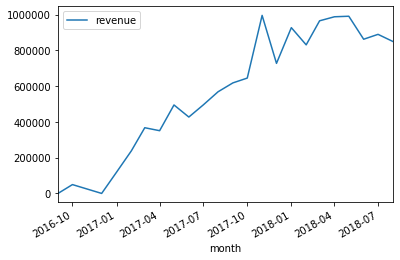

In [98]:
# 1. Using pandas plot method
df_agg.groupby("month").agg({"revenue": "sum"}).plot();

In [101]:
monthly_rev = df_agg.groupby("month").agg({"revenue": "sum"}).reset_index()
monthly_rev.head()

,month,revenue
0,2016-09-01,267.36
1,2016-10-01,49441.77
2,2016-12-01,10.90
3,2017-01-01,118610.23
4,2017-02-01,238268.92


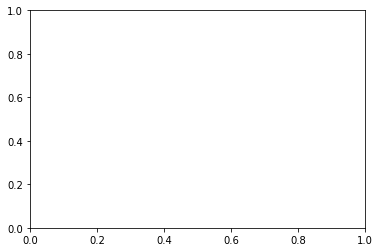

In [104]:
# 2. Using matplotlib / pyplot
fig, ax = plt.subplots()

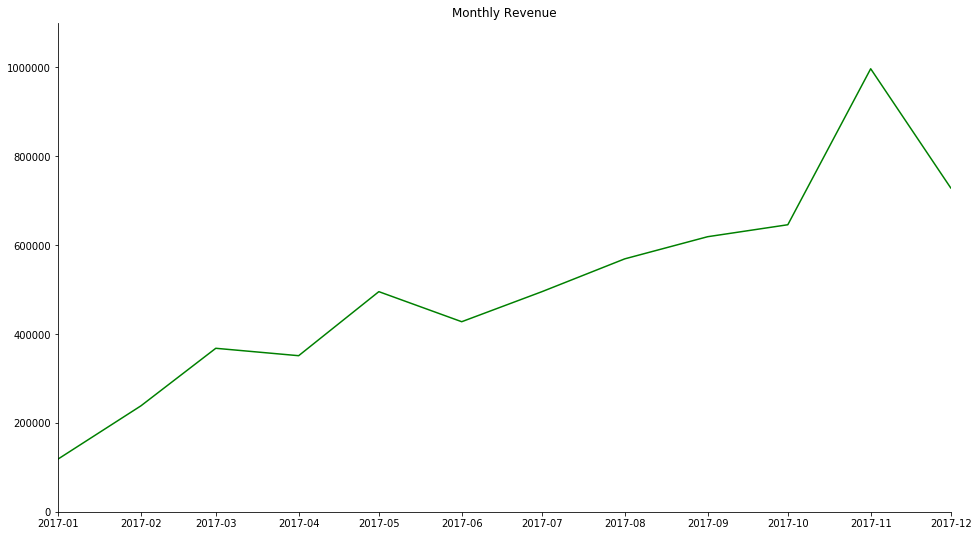

In [129]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(monthly_rev["month"],
        monthly_rev["revenue"],
        color="g");
ax.set_title("Monthly Revenue");
ax.set_ylim((0,1100000));
ax.set_xlim(("2017-01-01", "2017-12-01"));
#ax.set_facecolor("r");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
